In [3]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [34]:
import cv2
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('/content/drive/MyDrive/CUSTOM_DATA/data/sigmoid/sigmoid.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours in the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store the bounding boxes
boxes = []

# Loop over the contours
for contour in contours:
    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)
    # Add the bounding box to the list
    boxes.append((x, y, w, h))
    # Draw the bounding box on the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


    plt.imshow(image)

In [5]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Users/kamal/Tesseract-OCR/tesseract.exe'

In [19]:
import pytesseract
from PIL import Image

# Extract text from image using pytesseract
text = pytesseract.image_to_string(image)

# Print the extracted text
print(text)


TesseractNotFoundError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.utils import img_to_array,array_to_img, load_img
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range = 0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/sample_data/augmented/tan@/tan@ (1).png')
x = img_to_array(img)
x = x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1,save_to_dir = '/content/augmented', save_prefix = '/tan@',save_format= 'png'):
    i+=1
    if i > 100:
        break

    
                          
                                      

In [36]:
from tensorflow.keras.utils import img_to_array,array_to_img, load_img
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range = 0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/drive/MyDrive/CUSTOM_DATA/data/tan@/tan@ (1).png')
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape

(1, 256, 256, 3)

In [ ]:
# i=0
# for batch in datagen.flow(x,batch_size=1,save_to_dir = '/content/data/sigmoid/', save_prefix = 'sigmoid1',save_format= 'png'):
#     i+=1
#     if i > 1000:
#         break

i=0
for batch in datagen.flow(x,batch_size=1,save_to_dir = '/content/data/tan@/', save_prefix = 'tan',save_format= 'png'):
    i+=1
    if i > 700:
        break

In [22]:
T = len(os.listdir('/content/drive/MyDrive/CUSTOM_DATA/data/tan@'))  
T

1011

In [23]:
sig = len(os.listdir('/content/drive/MyDrive/CUSTOM_DATA/data/sigmoid'))
sig

1057

In [38]:
import pathlib
import numpy as np
data_dir = pathlib.Path('/content/drive/MyDrive/CUSTOM_DATA/data')
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_name

array(['sigmoid', 'tan@'], dtype='<U7')

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
        target_folder = target_dir+target_class
        
        random_image = random.sample(os.listdir(target_folder),1)
        print(random_image)
        
        img  = mpimg.imread(target_folder + "/" + random_image[0])
        plt.imshow(img)
        plt.title(target_class)
        plt.axis("off");
        print(f"Image shape: {img.shape}") #shape of image
            
        return img

In [40]:
img1 = view_random_image(target_dir = '/content/drive/MyDrive/CUSTOM_DATA/data',
                       target_class = '/sigmoid')      



['sigmoid1_0_5746.png']
Image shape: (256, 256, 3)


['tan_0_8293.png']
Image shape: (256, 256, 3)


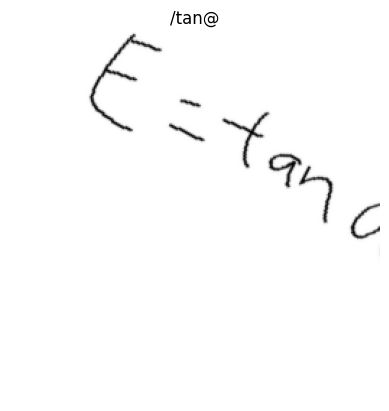

In [41]:
img1 = view_random_image(target_dir = '/content/drive/MyDrive/CUSTOM_DATA/data',
                       target_class = '/tan@')      


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
image_dir ='/content/drive/MyDrive/CUSTOM_DATA/data'
image_dir

'/content/drive/MyDrive/CUSTOM_DATA/data'

In [43]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
datagen

In [44]:
train_data = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(256, 256),
    class_mode='binary',
    batch_size=32,
    subset='training'
)

val_data = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(256, 256),
    class_mode='binary',
    batch_size=32,
    subset='validation'
)

Found 1654 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [45]:
len(train_data)

52

In [46]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 32,
                          kernel_size = 5,
                          activation = "relu",
                          input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3),
                            padding = "valid"),
    tf.keras.layers.Conv2D(filters = 32,
                          kernel_size = 5,
                          activation = "relu",
                          input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3),
                            padding = "valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
    
])
model.compile(loss='binary_crossentropy',optimizer = tf.keras.optimizers.RMSprop() ,metrics=['accuracy'])

history = model.fit(train_data,epochs=10,steps_per_epoch=len(train_data), validation_data=val_data)

Epoch 1/10
52/52 [==============================] - 10s 156ms/step - loss: 0.8103 - accuracy: 0.5054 - val_loss: 0.6927 - val_accuracy: 0.5206
Epoch 2/10
52/52 [==============================] - 7s 140ms/step - loss: 0.6966 - accuracy: 0.5097 - val_loss: 0.6921 - val_accuracy: 0.5061
Epoch 3/10
52/52 [==============================] - 9s 175ms/step - loss: 0.7135 - accuracy: 0.5254 - val_loss: 0.6907 - val_accuracy: 0.4988
Epoch 4/10
52/52 [==============================] - 7s 133ms/step - loss: 0.6846 - accuracy: 0.5871 - val_loss: 0.7293 - val_accuracy: 0.5424
Epoch 5/10
52/52 [==============================] - 8s 146ms/step - loss: 0.6106 - accuracy: 0.6723 - val_loss: 0.5877 - val_accuracy: 0.7022
Epoch 6/10
52/52 [==============================] - 7s 131ms/step - loss: 0.4667 - accuracy: 0.7866 - val_loss: 0.5449 - val_accuracy: 0.7458
Epoch 7/10
52/52 [==============================] - 8s 147ms/step - loss: 0.3120 - accuracy: 0.8791 - val_loss: 0.7938 - val_accuracy: 0.6126
Epoch

## Plot performance 


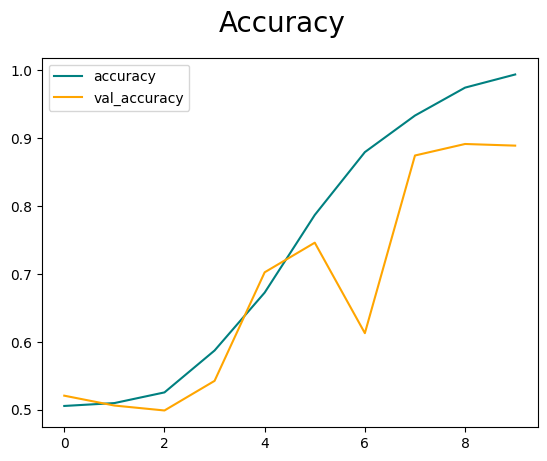

In [47]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [48]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
 val_data.

In [55]:
history.predict(img[1])

AttributeError: ignored

AttributeError: ignored

TEST

In [49]:
import cv2

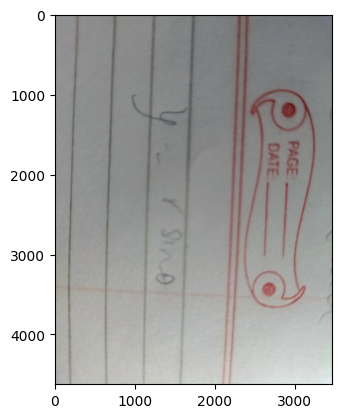

In [73]:
img = cv2.imread('/content/drive/MyDrive/IMG20230411172540.jpg')
plt.imshow(img)
plt.show()

In [75]:
yhat = model.predict(val_data)

13/13 [==============================] - 1s 101ms/step


In [76]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [77]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat 

1/1 [==============================] - 0s 21ms/step


array([[0.08918551]], dtype=float32)

In [1]:

if yhat > 0.5: 
    print(f'Predicted class is sigmoid')
else:
    print(f'Predicted class is  TAN@')

NameError: ignored

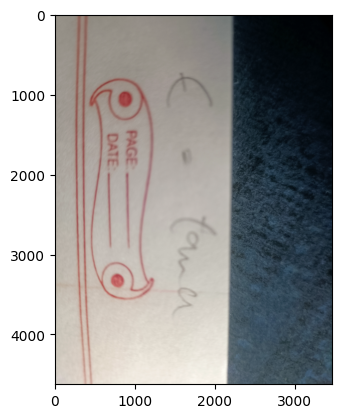

In [80]:
img1 = cv2.imread('/content/drive/MyDrive/IMG20230411172532.jpg')
plt.imshow(img1)
plt.show()

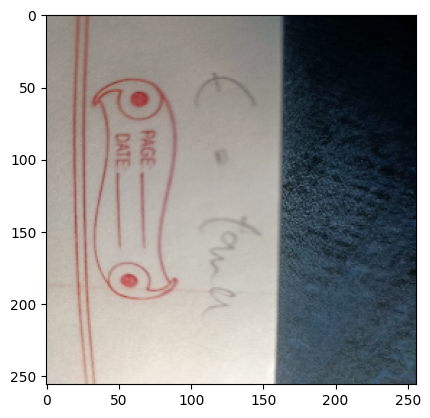

In [81]:
resize1 = tf.image.resize(img1, (256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [83]:
yhat = model.predict(np.expand_dims(resize1/255, 0))
yhat 

1/1 [==============================] - 0s 23ms/step


array([[0.22232851]], dtype=float32)